# MEMUAT LIBRARY DAN DRIVE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from google.colab import drive
print("Semua library berhasil dimuat.")

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


drive.mount('/content/drive')

Semua library berhasil dimuat.
Mounted at /content/drive


In [2]:
print("Memuat dan Memeriksa Data Awal...")
try:
    df= pd.read_csv('/content/drive/MyDrive/BPDS/employee_data.csv')
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'employee_data.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    exit()

Memuat dan Memeriksa Data Awal...
Data berhasil dimuat.


#1.  **Pemahaman Data**

In [3]:
print("\nDimensi Dataset:", df.shape)
print("\n5 Baris Pertama Data:")
print(df.head())
print("\n5 Baris Terakhir Data:")
print(df.tail())


Dimensi Dataset: (1470, 35)

5 Baris Pertama Data:
   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0              1                        4    Male

In [4]:
print("\nInformasi Tipe Data dan Nilai Non-Null:")
df.info()


Informasi Tipe Data dan Nilai Non-Null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement        

In [5]:
print(" Statistik Deskriptif untuk Kolom Numerik ")
print(df.describe().T)

 Statistik Deskriptif untuk Kolom Numerik 
                           count          mean          std     min      25%  \
EmployeeId                1470.0    735.500000   424.496761     1.0   368.25   
Age                       1470.0     36.923810     9.135373    18.0    30.00   
Attrition                 1058.0      0.169187     0.375094     0.0     0.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00 

In [6]:
print("  Statistik Deskriptif untuk Kolom Kategorikal ")
print(df.describe(include='object').T)

  Statistik Deskriptif untuk Kolom Kategorikal 
               count unique                     top  freq
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054


In [7]:
print("\nJumlah Nilai Unik (Cardinality) untuk Setiap Kolom:")
print(df.nunique())


Jumlah Nilai Unik (Cardinality) untuk Setiap Kolom:
EmployeeId                  1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears      

# 2. **Analisis Data Eksploratif**

In [8]:
print(" Menangani Nilai-Nilai Hilang (Missing Values)")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Jumlah Hilang': missing_values, 'Persentase (%)': missing_percentage})
print(missing_info[missing_info['Jumlah Hilang'] > 0].sort_values(by='Jumlah Hilang', ascending=False))

 Menangani Nilai-Nilai Hilang (Missing Values)
           Jumlah Hilang  Persentase (%)
Attrition            412       28.027211


In [9]:
print("Memeriksa Data Duplikat")
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat yang ditemukan: {duplicate_rows}")

Memeriksa Data Duplikat
Jumlah baris duplikat yang ditemukan: 0


In [10]:
df.dropna(subset=['Attrition'], inplace =True)
print(f"\nBaris dengan Nilai Attrition yang Hilang Telah Dihapus. Sisa data:{len(df)} baris.")


Baris dengan Nilai Attrition yang Hilang Telah Dihapus. Sisa data:1058 baris.


Attrition
0.0    879
1.0    179
Name: count, dtype: int64
Attrition
0.0    83.081285
1.0    16.918715
Name: proportion, dtype: float64


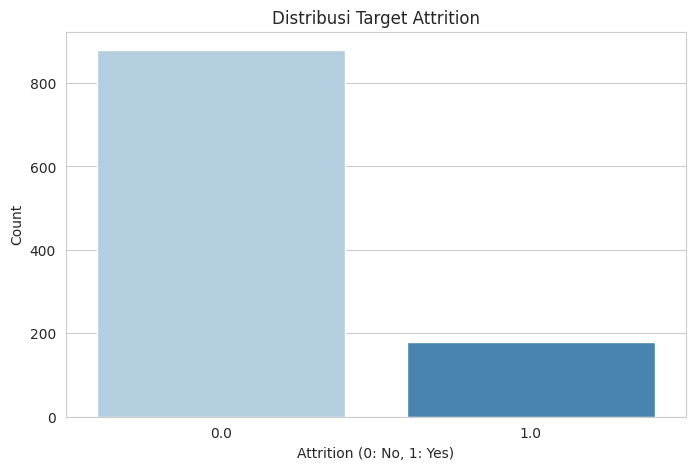

In [11]:
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)


attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_percentage)


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Attrition', palette="Blues")
plt.title("Distribusi Target Attrition")
plt.xlabel("Attrition (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

In [12]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Attrition')
numerical_features.remove('EmployeeCount')
numerical_features.remove('StandardHours')

print(f"\nFitur Kategorikal: {categorical_features}")
print(f"Fitur Numerikal: {numerical_features}")


Fitur Kategorikal: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Fitur Numerikal: ['EmployeeId', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [13]:
print(df[numerical_features].var())

EmployeeId                  1.827054e+05
Age                         8.855602e+01
DailyRate                   1.668543e+05
DistanceFromHome            6.465137e+01
Education                   1.063873e+00
EnvironmentSatisfaction     1.194560e+00
HourlyRate                  4.131000e+02
JobInvolvement              4.966440e-01
JobLevel                    1.291664e+00
JobSatisfaction             1.219134e+00
MonthlyIncome               2.340329e+07
MonthlyRate                 4.967539e+07
NumCompaniesWorked          6.368182e+00
PercentSalaryHike           1.325759e+01
PerformanceRating           1.278192e-01
RelationshipSatisfaction    1.190215e+00
StockOptionLevel            7.014690e-01
TotalWorkingYears           6.426313e+01
TrainingTimesLastYear       1.696999e+00
WorkLifeBalance             5.004033e-01
YearsAtCompany              3.925307e+01
YearsInCurrentRole          1.308609e+01
YearsSinceLastPromotion     1.067295e+01
YearsWithCurrManager        1.295312e+01
dtype: float64


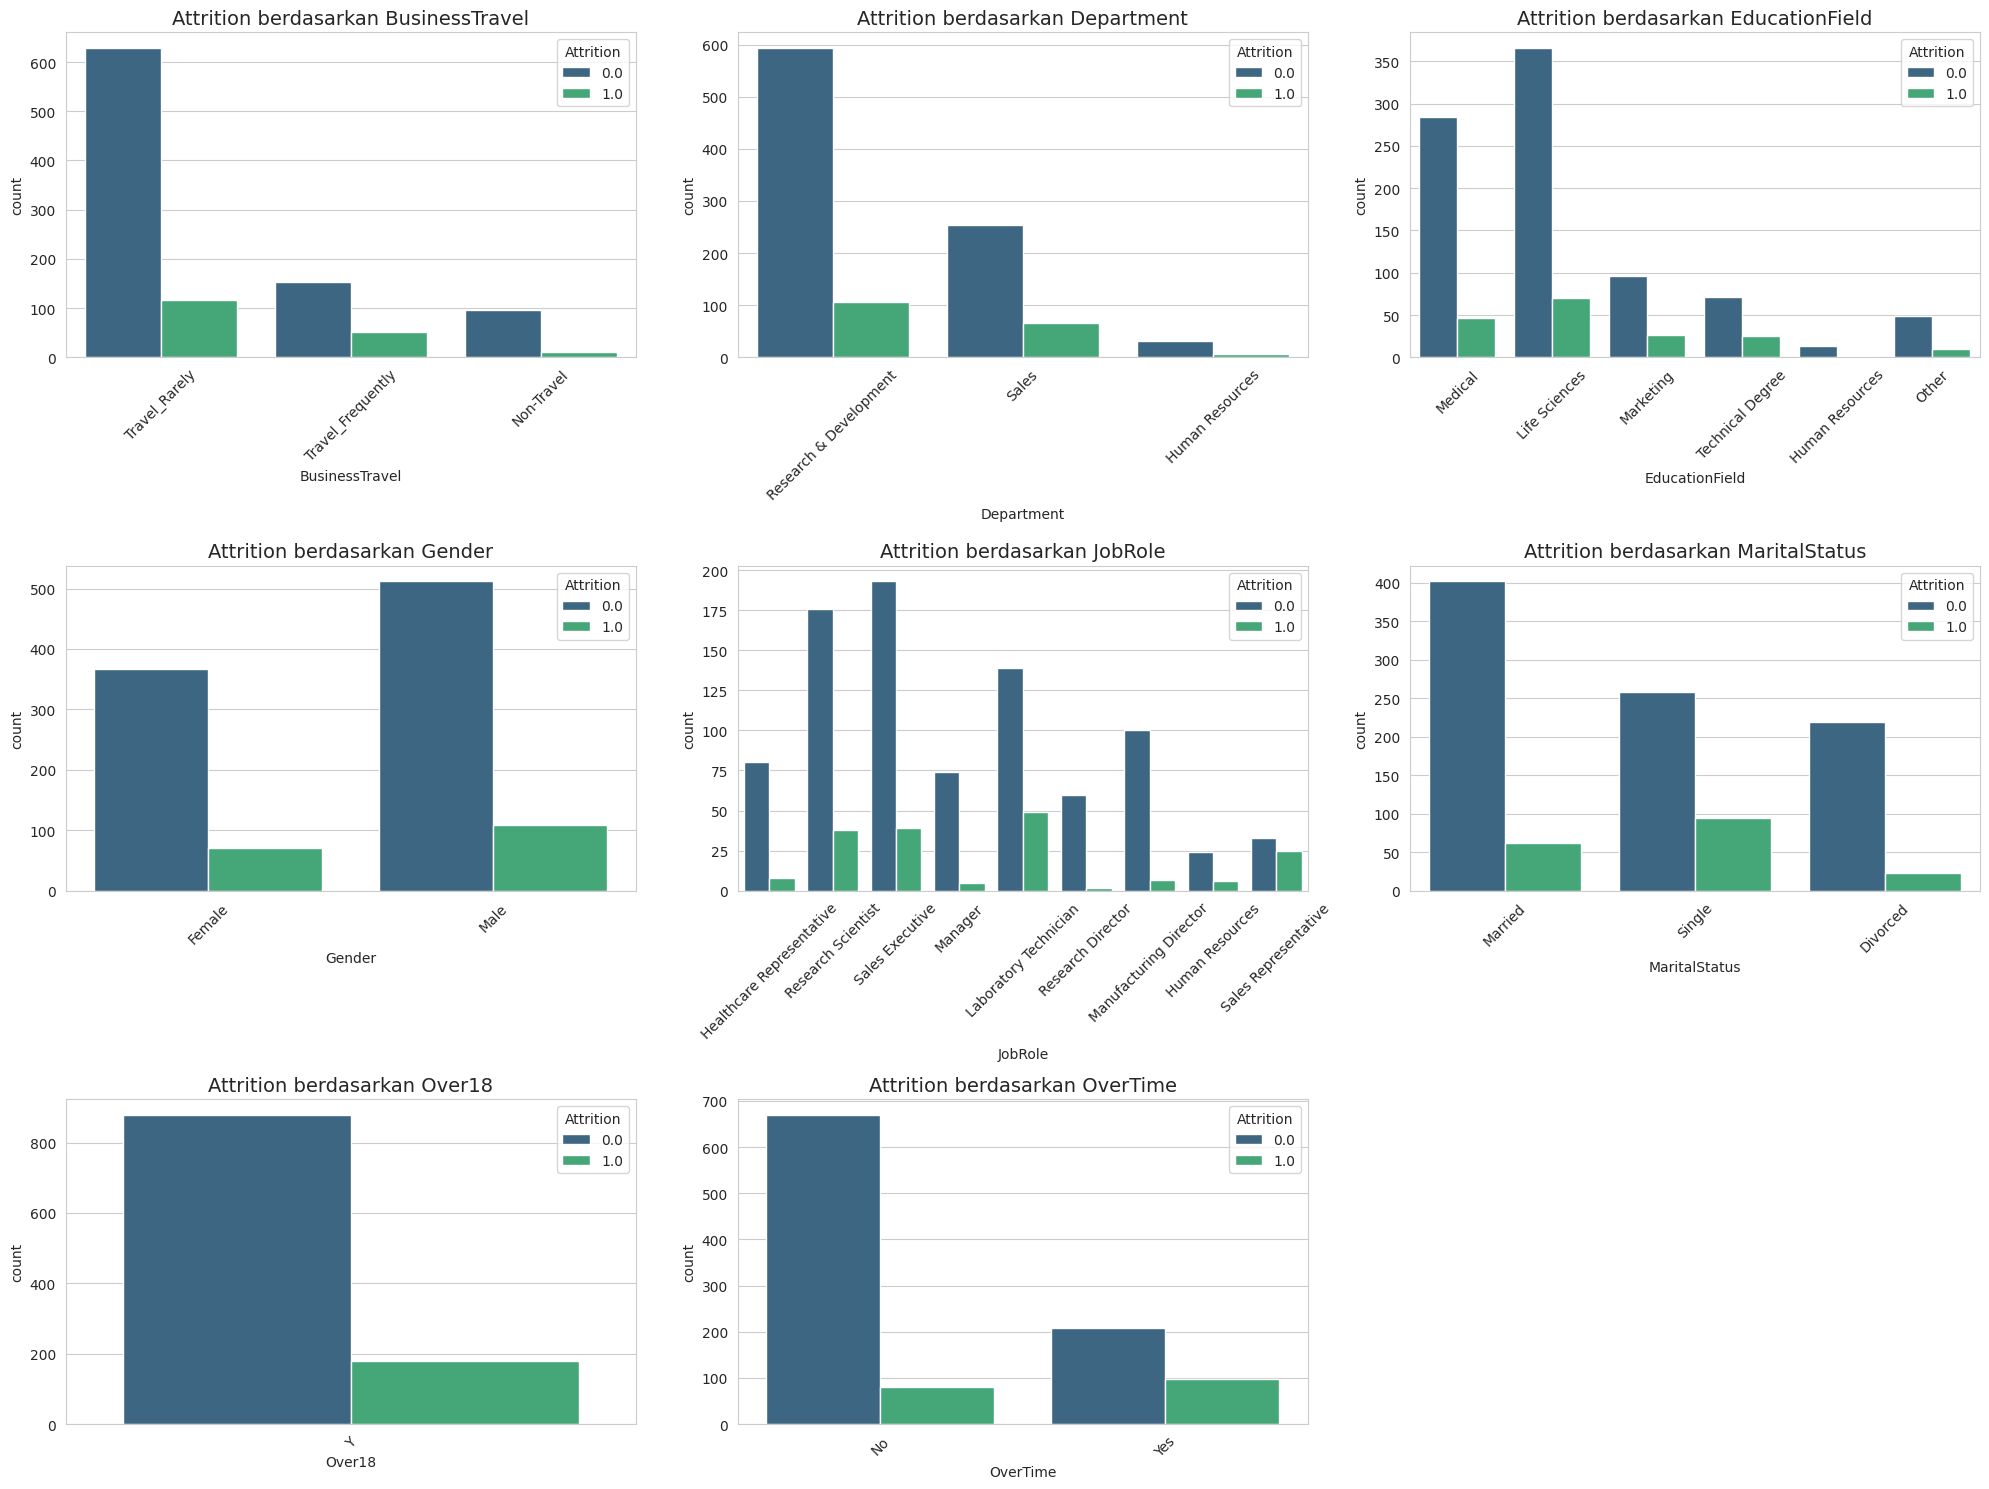

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  #
plt.figure(figsize=(20, 5 * n_rows))

for i, feature in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=feature, data=df, hue='Attrition', palette='viridis')
    plt.title(f'Attrition berdasarkan {feature}', fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

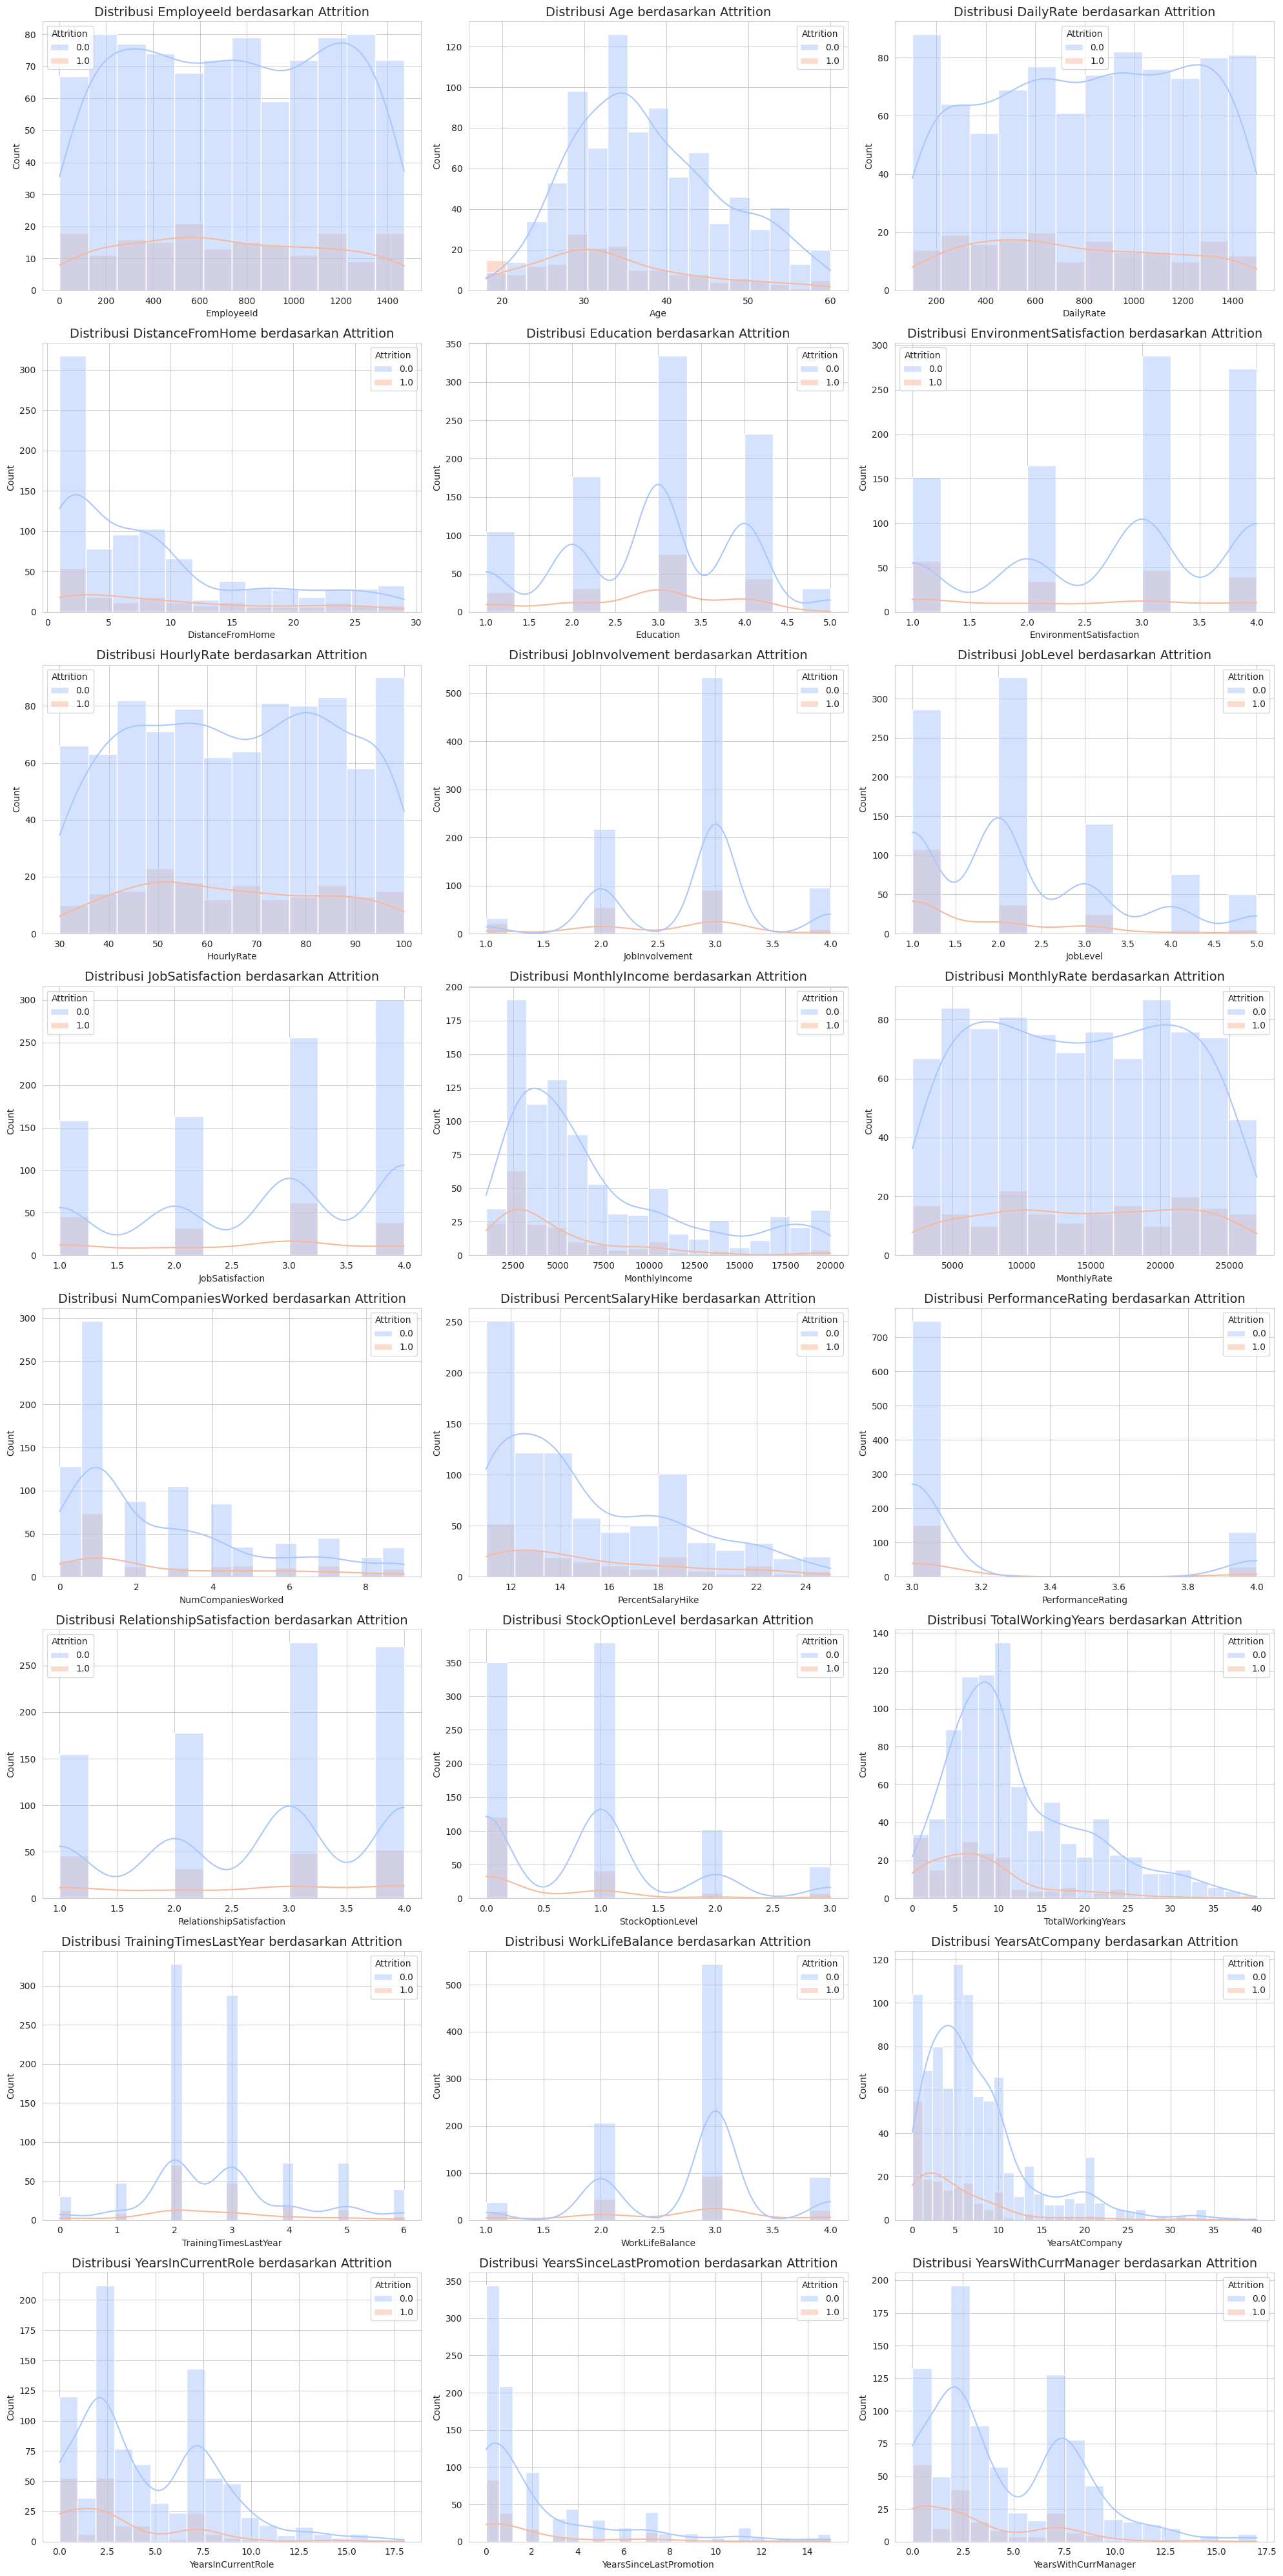

In [15]:
n_cols =
n_rows = (len(numerical_features) + n_cols - 1) // n_cols
plt.figure(figsize=(20, 5 * n_rows))

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=feature, hue='Attrition', kde=True, palette='coolwarm')
    plt.title(f'Distribusi {feature} berdasarkan Attrition', fontsize=14)

plt.tight_layout()
plt.show()


Analisis Korelasi antar Fitur Numerikal...


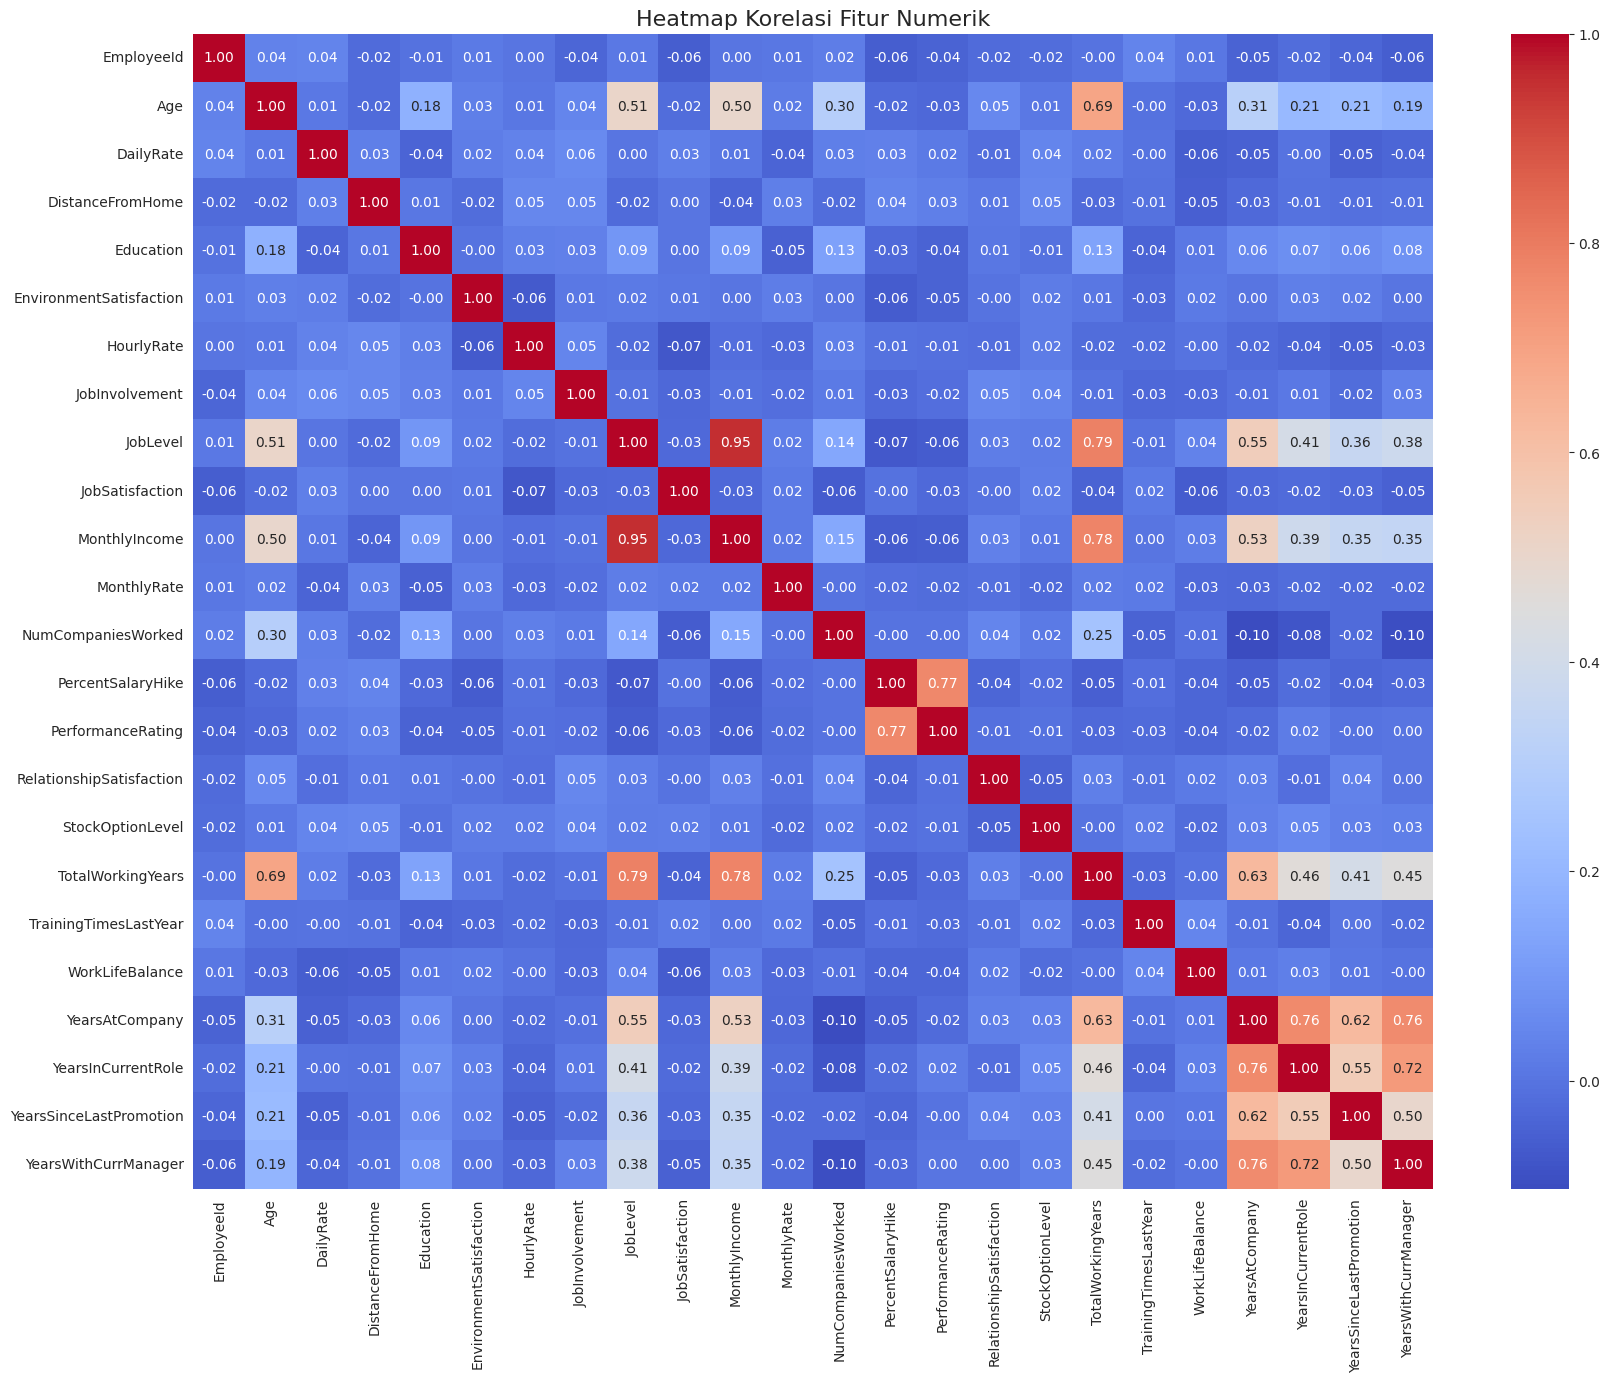

Insight: Terdapat korelasi kuat antara beberapa variabel seperti 'JobLevel' dengan 'MonthlyIncome', dan 'YearsAtCompany' dengan 'YearsWithCurrManager'. Ini wajar.


In [16]:
print("\nAnalisis Korelasi antar Fitur Numerikal...")
plt.figure(figsize=(20, 15))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=16)
plt.show()
print("Insight: Terdapat korelasi kuat antara beberapa variabel seperti 'JobLevel' dengan 'MonthlyIncome', dan 'YearsAtCompany' dengan 'YearsWithCurrManager'. Ini wajar.")

#3. **PRA-PEMROSESAN DATA (DATA PREPARATION)**

In [17]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [18]:
print("--- Menyimpan dataset yang sudah dibersihkan dan di-encode ---")

df_cleaned = pd.concat([X, y], axis=1)

df_cleaned.to_csv("dataset_cleaned.csv", index=False)
print("Dataset Cleaned berhasil disimpan sebagai dataset_cleaned.csv")
print("-" * 50)

--- Menyimpan dataset yang sudah dibersihkan dan di-encode ---
Dataset Cleaned berhasil disimpan sebagai dataset_cleaned.csv
--------------------------------------------------


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data dibagi menjadi: {X_train.shape} data latih dan {X_test.shape} data uji.")

Data dibagi menjadi: (846, 34) data latih dan (212, 34) data uji.


In [20]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    [
        ("numerical", StandardScaler(), numerical_features),
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)
print("\nPipeline preprocessing (StandardScaler & OneHotEncoder) telah dibuat.")

print("\nTahap 3 Selesai.\n")


Pipeline preprocessing (StandardScaler & OneHotEncoder) telah dibuat.

Tahap 3 Selesai.



# 4. **PEMODELAN**

In [21]:
models_to_evaluate = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

evaluation_results = []

In [22]:
print("\nMemulai Skenario 1: Tanpa SMOTE...")
for name, model in models_to_evaluate.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    evaluation_results.append([f"{name} (No SMOTE)",
                               accuracy_score(y_test, y_pred),
                               precision_score(y_test, y_pred),
                               recall_score(y_test, y_pred),
                               f1_score(y_test, y_pred),
                               roc_auc_score(y_test, y_proba)])

    print(f"Evaluasi untuk {name} (No SMOTE) selesai.")


Memulai Skenario 1: Tanpa SMOTE...
Evaluasi untuk Logistic Regression (No SMOTE) selesai.
Evaluasi untuk Random Forest (No SMOTE) selesai.
Evaluasi untuk XGBoost (No SMOTE) selesai.


In [23]:
print("\nMemulai Skenario 2: Dengan SMOTE...")
smote_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor), ('smote', SMOTE(random_state=42)), ('classifier', model)])
smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)
y_proba_smote = smote_pipeline.predict_proba(X_test)[:,1]
evaluation_results.append([f"{name} (With SMOTE)", accuracy_score(y_test, y_pred_smote),
                               precision_score(y_test, y_pred_smote), recall_score(y_test, y_pred_smote),
                               f1_score(y_test, y_pred_smote), roc_auc_score(y_test, y_proba_smote)])

print(f"Evaluasi untuk {name} (With SMOTE) selesai.")



Memulai Skenario 2: Dengan SMOTE...
Evaluasi untuk XGBoost (With SMOTE) selesai.


# 5. **EVALUASI**

In [24]:
print(f"\n--- Classification Report: {name} (With SMOTE) ---")
print(classification_report(y_test, y_pred_smote, target_names=['Bertahan (0)', 'Keluar (1)']))


results_df = pd.DataFrame(evaluation_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"])
print("\n\n" + "="*30)
print("HASIL RINGKASAN PERBANDINGAN MODEL (DENGAN SMOTE)")
print("="*30)

print(results_df[results_df['Model'].str.contains("With SMOTE")].to_string())


--- Classification Report: XGBoost (With SMOTE) ---
              precision    recall  f1-score   support

Bertahan (0)       0.89      0.94      0.92       176
  Keluar (1)       0.62      0.44      0.52        36

    accuracy                           0.86       212
   macro avg       0.75      0.69      0.72       212
weighted avg       0.85      0.86      0.85       212



HASIL RINGKASAN PERBANDINGAN MODEL (DENGAN SMOTE)
                  Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
3  XGBoost (With SMOTE)  0.858491   0.615385  0.444444  0.516129  0.787721


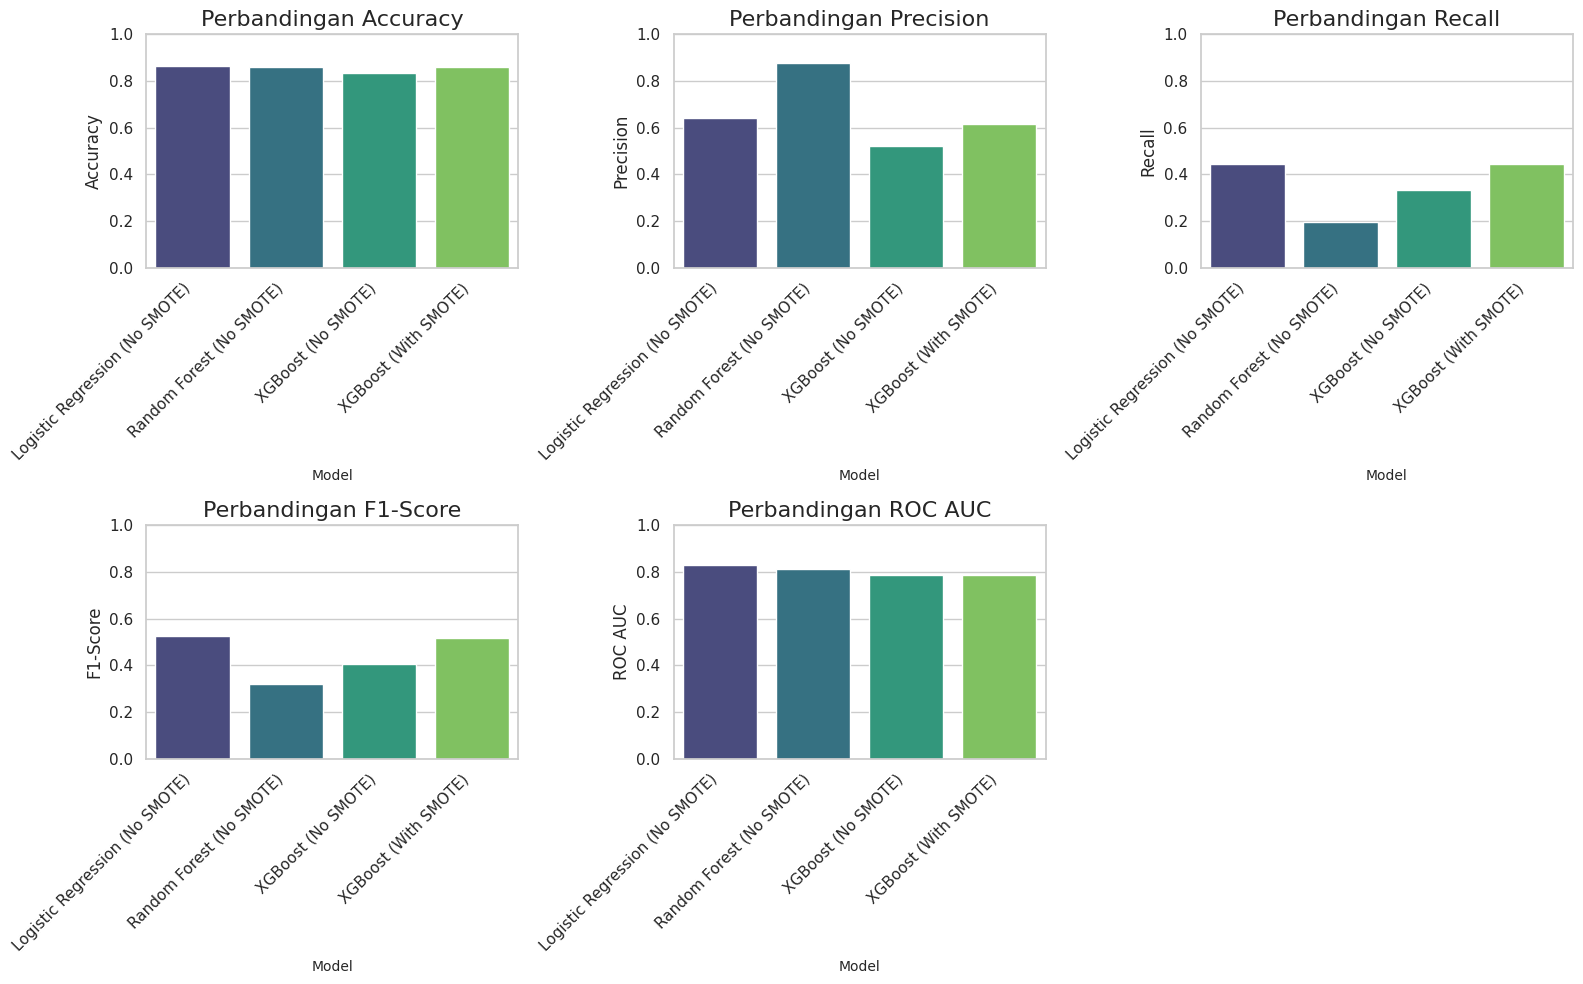

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
n_models = len(results_df)

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'Perbandingan {metric}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.xlabel('Model', fontsize=10)
    plt.ylabel(metric, fontsize=12)

plt.tight_layout()
plt.show()



Memulai Pemilihan Model Terbaik Secara Otomatis...

Berdasarkan F1-Score tertinggi, model terbaik adalah: 'XGBoost (With SMOTE)'
Objek classifier yang akan digunakan: XGBClassifier
Pipeline final dengan model terbaik telah berhasil dilatih.


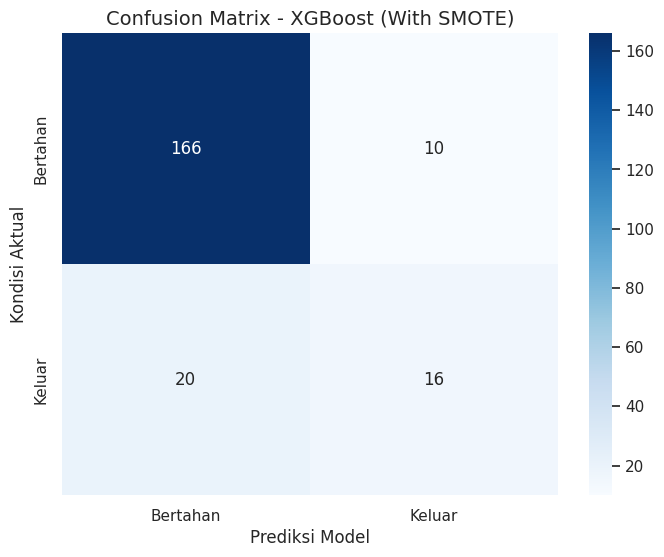

In [26]:
smote_results = results_df[results_df['Model'].str.contains("With SMOTE")].copy()

best_model_info = smote_results.loc[smote_results['F1-Score'].idxmax()]
best_model_name_full = best_model_info['Model']
print(f"\nBerdasarkan F1-Score tertinggi, model terbaik adalah: '{best_model_name_full}'")

best_model_base_name = best_model_name_full.replace(" (With SMOTE)", "")
best_classifier = models_to_evaluate[best_model_base_name]
print(f"Objek classifier yang akan digunakan: {best_classifier.__class__.__name__}")

final_model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', best_classifier)
])
final_model_pipeline.fit(X_train, y_train)
print("Pipeline final dengan model terbaik telah berhasil dilatih.")
print("="*50)


y_pred_final = final_model_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bertahan', 'Keluar'], yticklabels=['Bertahan', 'Keluar'])

plt.title(f'Confusion Matrix - {best_model_name_full}', fontsize=14)
plt.xlabel('Prediksi Model')
plt.ylabel('Kondisi Aktual')
plt.show()


# 6. **ANALISIS TAHAP 6: ANALISIS FAKTOR PENTING (FEATURE IMPORTANCE)**

In [27]:
print("--- Memulai Tahap 6: Analisis Faktor Penting ---")

# Ekstrak feature importance dari model terbaik (XGBoost)
importances = final_model_pipeline.named_steps['classifier'].feature_importances_
ohe_feature_names = final_model_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([np.array(numerical_features), ohe_feature_names])
importances = final_model_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

print("\n15 Faktor Paling Berpengaruh Terhadap Attrition:")
print(feature_importance_df)

--- Memulai Tahap 6: Analisis Faktor Penting ---

15 Faktor Paling Berpengaruh Terhadap Attrition:
                              Feature  Importance
53                        OverTime_No    0.193549
18                   StockOptionLevel    0.091994
9                            JobLevel    0.047188
51               MaritalStatus_Single    0.046650
37    EducationField_Technical Degree    0.044740
42      JobRole_Laboratory Technician    0.036110
46         JobRole_Research Scientist    0.028553
35             EducationField_Medical    0.027535
40  JobRole_Healthcare Representative    0.025640
8                      JobInvolvement    0.023059
33       EducationField_Life Sciences    0.022944
27   BusinessTravel_Travel_Frequently    0.022273
38                      Gender_Female    0.021861
19                  TotalWorkingYears    0.019391
48       JobRole_Sales Representative    0.019100


In [28]:
print("--- Menyimpan feature importance dari model terbaik ---")

feature_importance_df.to_csv("feature_importance.csv", index=False)

print("Feature importance berhasil disimpan sebagai feature_importance.csv")
print("-" * 50)

--- Menyimpan feature importance dari model terbaik ---
Feature importance berhasil disimpan sebagai feature_importance.csv
--------------------------------------------------


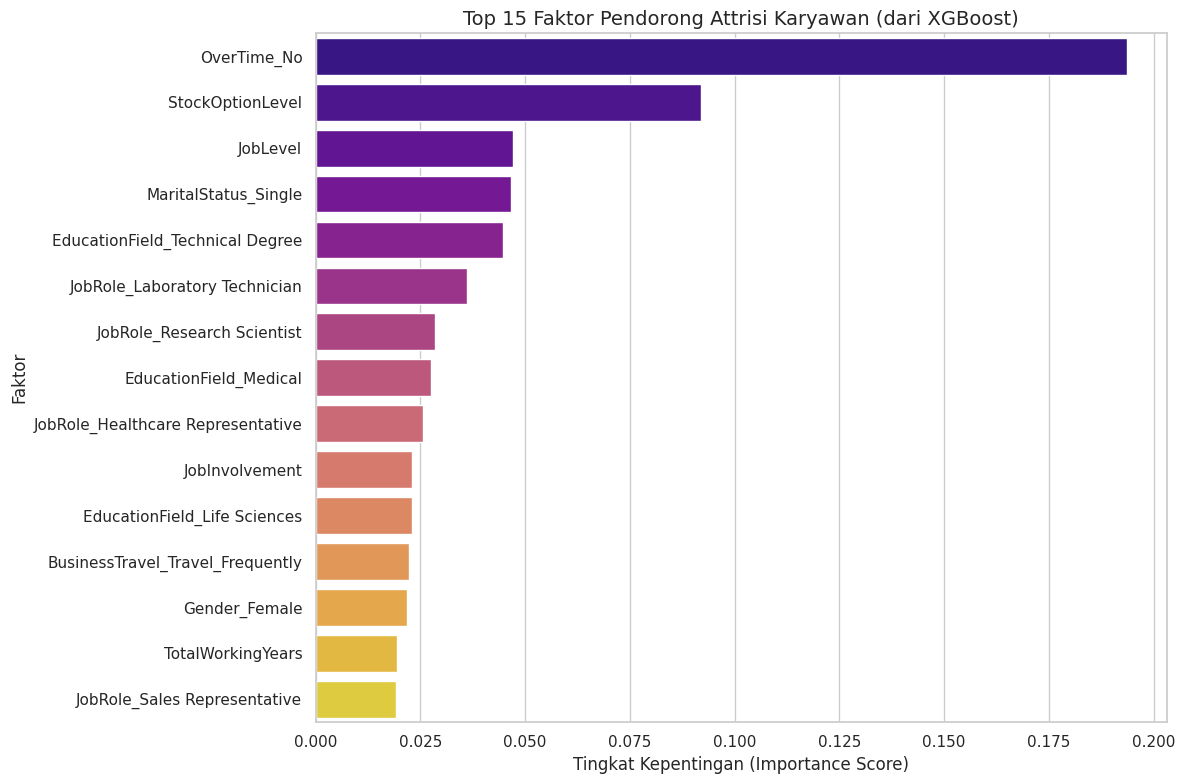


Tahap 6 Selesai.



In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')
plt.title('Top 15 Faktor Pendorong Attrisi Karyawan (dari XGBoost)', fontsize=14)
plt.xlabel('Tingkat Kepentingan (Importance Score)')
plt.ylabel('Faktor')
plt.tight_layout()
plt.show()

print("\nTahap 6 Selesai.\n")

# 7. PENYIMPANAN MODEL

In [30]:
print("--- Memulai Tahap 7: Penyimpanan Model ---")
joblib.dump(final_model_pipeline, 'employee_attrition_final_pipeline.joblib')
print("Pipeline model terbaik berhasil disimpan sebagai 'employee_attrition_final_pipeline.joblib'\n")

--- Memulai Tahap 7: Penyimpanan Model ---
Pipeline model terbaik berhasil disimpan sebagai 'employee_attrition_final_pipeline.joblib'



In [32]:
df_original = pd.read_csv('/content/dataset_cleaned.csv')

predictions = final_model_pipeline.predict(X)
prediction_probabilities = final_model_pipeline.predict_proba(X)[:, 1]

print(f"Panjang df_original: {len(df_original)}")
print(f"Panjang X: {len(X)}")


if len(df_original) != len(X):
    print("Ada masalah dengan panjang data. Pastikan X dihasilkan dari df_original yang sesuai.")
else:

    df_results = df_original.copy()
    df_results['Predicted_Attrition_Label'] = predictions
    df_results['Risk_Probability'] = prediction_probabilities

df_results['Predicted_Attrition_Label'] = df_results['Predicted_Attrition_Label'].map({0: 'No', 1: 'Yes'})


print("\nContoh hasil prediksi yang digabungkan dengan data asli:")
print(df_results[[ 'Attrition', 'Predicted_Attrition_Label', 'Risk_Probability']].head())

df_results.to_csv("model_prediction_results.csv", index=False)
print("\nHasil prediksi model untuk seluruh dataset berhasil disimpan sebagai model_prediction_results.csv")
print("\n--- Alur Kerja Proyek Selesai ---")

--- Memulai Tahap 8: Pembuatan dan Penyimpanan Hasil Prediksi ---
Panjang df_original: 1058
Panjang X: 1058

Contoh hasil prediksi yang digabungkan dengan data asli:
   Attrition Predicted_Attrition_Label  Risk_Probability
0        1.0                       Yes          0.989544
1        1.0                       Yes          0.981681
2        0.0                        No          0.002728
3        0.0                        No          0.015759
4        1.0                       Yes          0.926680

Hasil prediksi model untuk seluruh dataset berhasil disimpan sebagai model_prediction_results.csv

--- Alur Kerja Proyek Selesai ---
